# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Samuel Avrilianto Bhasarie]
- **Email:** [avriliantobhasarie@gmail.com]
- **ID Dicoding:** [sambhsr]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola penyewaan sepeda harian dalam setahun? 
Apakah ada musim tertentu dengan penyewaan tertinggi?
- Pertanyaan 2 : Apakah hari dengan kondisi cuaca tertentu (hujan, cerah, berawan) 
memiliki jumlah penyewaan yang lebih tinggi atau rendah?
- Pertanyaan 3 : Siapa yang lebih banyak menyewa sepeda di hari kerja dan akhir pekan: pelanggan biasa atau pelanggan terdaftar?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# Load datasets
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset day.csv berhasil dimuat, berisi data penyewaan sepeda harian.
- Kolom-kolom utama mencakup informasi tanggal, cuaca, musim, dan jumlah penyewaan sepeda.

### Assessing Data

In [4]:
# Tampilkan info dasar
print("\nInfo Dataset Day:")
print(day_df.info())


Info Dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [5]:
#Cek Missing Values
print(day_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
#Cek Duplikasi Data
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


In [7]:
#Menampilkan Ringkasan Parameter Statistik
print(day_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

**Insight:**
- Tidak terlalu perlu melakukan cleaning data karena tidak terdapat missing values dan duplicate pada data
- Mengubah tipe data "dteday" menjadi datetime

### Cleaning Data

In [8]:
# Konversi kolom tanggal (dteday) ke format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [9]:
#Mengecek tipe data
print("\nInfo Dataset Day:")
print(day_df.info())


Info Dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: date

In [10]:
# Simpan data yang sudah dibersihkan ke file CSV baru
day_df.to_csv("cleaned_bike_data.csv", index=False)
print("Dataset berhasil disimpan sebagai 'cleaned_bike_data.csv'")

Dataset berhasil disimpan sebagai 'cleaned_bike_data.csv'


**Insight:**
- Kolom dteday berhasil dikonversi menjadi format datetime.
- Dataset telah siap digunakan untuk analisis lebih lanjut tanpa perlu pembersihan tambahan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [12]:
# Mapping nilai season ke label musim
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df["season"] = day_df["season"].map(season_labels)

# Pivot table jumlah penyewaan sepeda berdasarkan musim
season_pivot = day_df.pivot_table(values="cnt", index="season", aggfunc="mean")

# Sort dari tertinggi ke terendah
season_pivot = season_pivot.sort_values(by="cnt", ascending=False)
print(season_pivot)


                cnt
season             
Fall    5644.303191
Summer  4992.331522
Winter  4728.162921
Spring  2604.132597


In [13]:
# Mengelompokkan data berdasarkan tahun dan menjumlahkan registered & casual
yearly_rentals = day_df.groupby(by="yr")[["registered", "casual"]].sum().reset_index()

# Mengubah nilai kolom 'yr' menjadi tahun yang sebenarnya (0 → 2011, 1 → 2012)
yearly_rentals["yr"] = yearly_rentals["yr"].map({0: 2011, 1: 2012})

# Menampilkan hasil
yearly_rentals


,yr,registered,casual
0,2011,995851,247252
1,2012,1676811,372765


**Insight:**
- Berdasarkan hasil tersebut, diketahui bahwa season fall dan summer merupakan dua musim yang memiliki jumlah penyewaan terbanyak.
- Berdasarkan hasil diatas, seseorang yang sudah menjadi member dengan belum menjadi member memiliki nilai yang cukup jauh, seseorang yang sudah mempunyai member pada tahun 2011 sebanyak 995851 sedangkan yang belum menjadi member sebanyak 247252 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda harian dalam setahun? Apakah ada musim tertentu dengan penyewaan tertinggi?

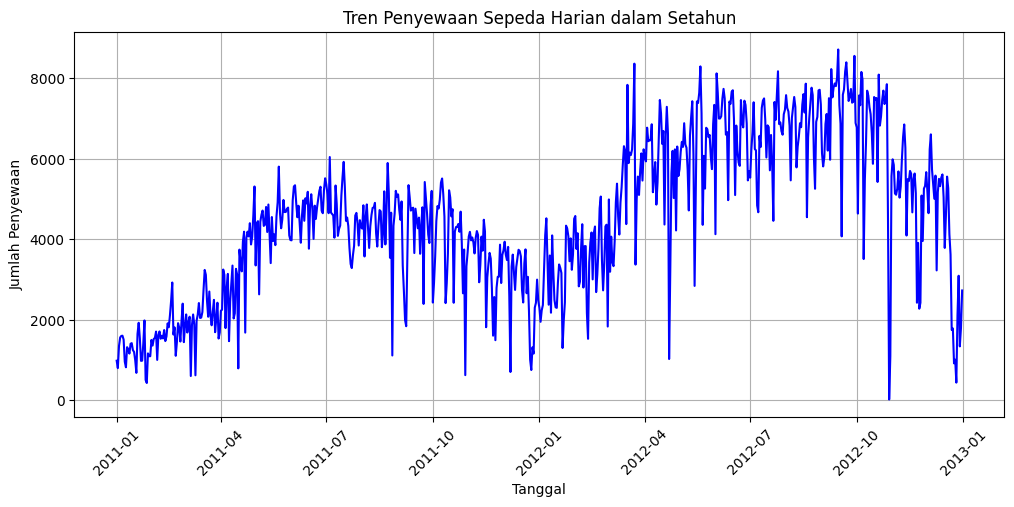

In [14]:
plt.figure(figsize=(12,5))
plt.plot(day_df["dteday"], day_df["cnt"], linestyle='-', color='b')
plt.title("Tren Penyewaan Sepeda Harian dalam Setahun")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Berdasarkan line plot ini terlihat adanya tren peningkatan jumlah penyewaan sepeda dari awal tahun hingga pertengahan tahun.
Jumlah penyewaan sepeda mencapai puncaknya sekitar pertengahan hingga akhir tahun 2012.
Ini menunjukkan bahwa periode tersebut adalah waktu favorit bagi pengguna sepeda.

C:\Users\samue\AppData\Local\Temp\ipykernel_10648\1417695066.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=season_avg, palette='viridis')


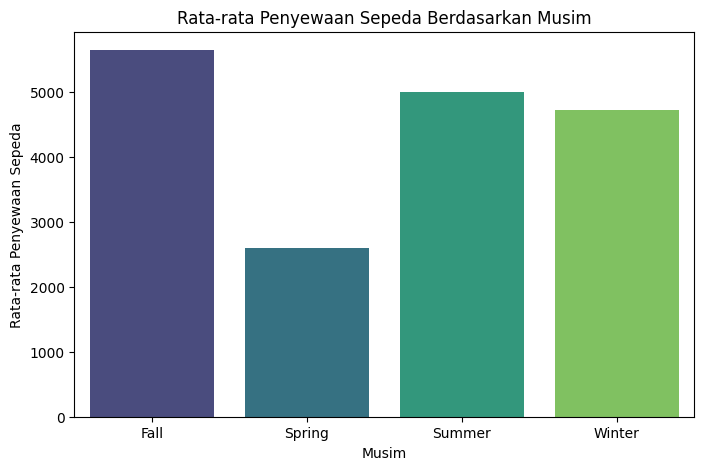

In [15]:
# Hitung rata-rata penyewaan per musim
season_avg = day_df.groupby('season')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=season_avg, palette='viridis')
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.show()


Dari Bar Chart diatas dapat dilihat bahwa penyewaan paling banyak dilakukan pada musim Fall dan paling sedikit pada musim Spring

### Pertanyaan 2: Apakah hari dengan kondisi cuaca tertentu (hujan, cerah, berawan) memiliki jumlah penyewaan yang lebih tinggi atau rendah?

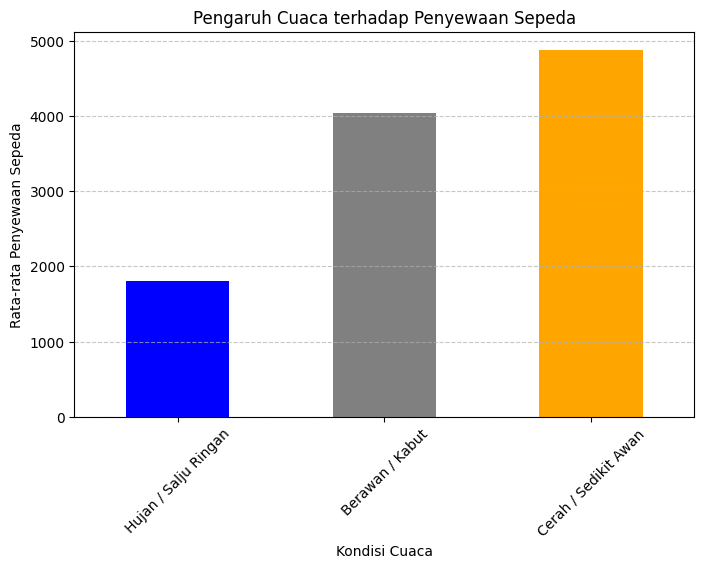

In [16]:
# Buat label kondisi cuaca berdasarkan README
weather_labels = {
    1: "Cerah / Sedikit Awan",
    2: "Berawan / Kabut",
    3: "Hujan / Salju Ringan",
    4: "Hujan Lebat / Salju Lebat / Kabut + Angin Kencang"
}

# Tambahkan kolom deskripsi cuaca
day_df["weather_desc"] = day_df["weathersit"].map(weather_labels)

# Hitung rata-rata penyewaan berdasarkan kondisi cuaca
weather_avg_rentals = day_df.groupby("weather_desc")["cnt"].mean().sort_values()

# Plot hasil analisis
plt.figure(figsize=(8, 5))
weather_avg_rentals.plot(kind="bar", color=["blue", "gray", "orange", "red"])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

Disini dapat terlihat bahwa penyewaan sepeda lebih banyak dilakukan pada cuaca yang cerah.

### Pertanyaan 3: Siapa yang lebih banyak menyewa sepeda di hari kerja dan akhir pekan: pelanggan biasa atau pelanggan terdaftar?

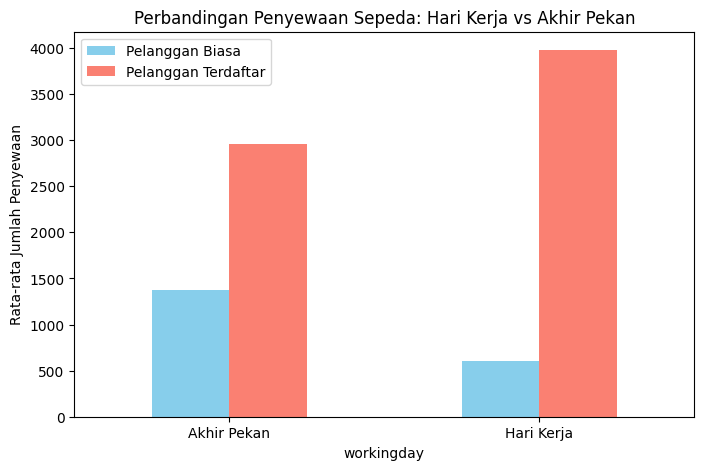

In [17]:
# Hitung rata-rata penyewaan berdasarkan workingday (0 = akhir pekan, 1 = hari kerja)
grouped = day_df.groupby("workingday")[["casual", "registered"]].mean()

# Atur label
labels = ["Akhir Pekan", "Hari Kerja"]

# Plot data
fig, ax = plt.subplots(figsize=(8, 5))
grouped.plot(kind="bar", stacked=False, color=["skyblue", "salmon"], ax=ax)

# Format plot
ax.set_xticklabels(labels, rotation=0)
ax.set_ylabel("Rata-rata Jumlah Penyewaan")
ax.set_title("Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
ax.legend(["Pelanggan Biasa", "Pelanggan Terdaftar"])

plt.show()

Disini pelanggan terdaftar mendominasi dalam penyewaan sepeda terutama pada hari kerja, meskipun pada akhir pekan, pelanggan biasa meningkat, tapi tetap didominasi oleh pelanggan terdaftar.

## Analisis Lanjutan (Opsional)

Disini saya menerapkan analisis lanjutan berupa clustering analysis

1. Manual Grouping: Penyewaan Berdasarkan Musim dan Cuaca

In [18]:
# Mengelompokkan rata-rata penyewaan berdasarkan musim dan kondisi cuaca
weather_labels = {1: "Cerah", 2: "Berawan", 3: "Hujan", 4: "Salju"}
day_df["weather_name"] = day_df["weathersit"].map(weather_labels)

season_weather_group = day_df.groupby(["season", "weather_name"])["cnt"].mean().reset_index()

# Menampilkan hasil
print(season_weather_group.sort_values(by="cnt", ascending=False))


    season weather_name          cnt
1     Fall        Cerah  5878.257353
7   Summer        Cerah  5548.548673
0     Fall      Berawan  5222.479167
10  Winter        Cerah  5043.563107
9   Winter      Berawan  4654.000000
6   Summer      Berawan  4236.705882
4   Spring        Cerah  2811.135135
2     Fall        Hujan  2751.750000
3   Spring      Berawan  2357.166667
11  Winter        Hujan  1961.600000
8   Summer        Hujan  1169.000000
5   Spring        Hujan   934.750000


- Penyewaan sepeda tertinggi terjadi pada musim gugur (Fall) dan musim panas (Summer) saat cuaca cerah.
Contoh: Musim Gugur - Cuaca Cerah (5878 penyewaan) dan Musim Panas - Cuaca Cerah (5548 penyewaan).

- Musim dingin (Winter) dan musim semi (Spring) memiliki jumlah penyewaan lebih rendah, terutama saat cuaca berawan atau hujan.
Contoh: Musim Semi - Hujan (934 penyewaan) adalah yang terendah.

- Cuaca sangat memengaruhi jumlah penyewaan. Saat hujan atau berawan, penyewaan turun drastis dibandingkan saat cerah.

2. Binning: Mengelompokkan Jumlah Penyewaan

In [19]:
# Menentukan batas untuk kategori rendah, sedang, tinggi berdasarkan kuantil
bins = [day_df["cnt"].min(), day_df["cnt"].quantile(0.33), day_df["cnt"].quantile(0.66), day_df["cnt"].max()]
labels = ["Rendah", "Sedang", "Tinggi"]

# Membuat kategori berdasarkan jumlah penyewaan
day_df["rental_category"] = pd.cut(day_df["cnt"], bins=bins, labels=labels, include_lowest=True)

# Melihat distribusi kategori
print(day_df["rental_category"].value_counts())


rental_category
Tinggi    249
Rendah    241
Sedang    241
Name: count, dtype: int64


C:\Users\samue\AppData\Local\Temp\ipykernel_10648\180647614.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=binning_counts.index, y=binning_counts.values, palette="viridis")


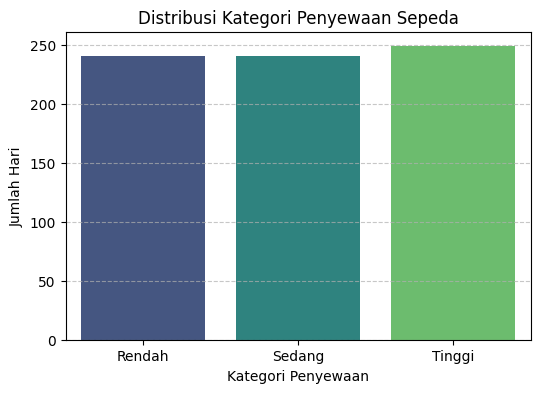

In [20]:
# Hitung jumlah data dalam setiap kategori binning
binning_counts = day_df["rental_category"].value_counts()

# Visualisasi hasil binning
plt.figure(figsize=(6, 4))
sns.barplot(x=binning_counts.index, y=binning_counts.values, palette="viridis")

# Tambahkan label
plt.xlabel("Kategori Penyewaan")
plt.ylabel("Jumlah Hari")
plt.title("Distribusi Kategori Penyewaan Sepeda")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()


- Jumlah hari dengan penyewaan "Tinggi" (249 hari) lebih banyak dibandingkan "Sedang" (241 hari) dan "Rendah" (241 hari).

- Distribusi kategori cukup seimbang, menunjukkan bahwa penyewaan sepeda cukup stabil sepanjang tahun.

- Ada beberapa hari dengan penyewaan sangat tinggi, kemungkinan besar terjadi saat musim panas dan musim gugur ketika cuaca cerah.

## Conclusion

1. Conclution pertanyaan 1
    - Penyewaan sepeda menunjukkan pola musiman, dengan peningkatan di musim panas dan penurunan di musim dingin.
    - Bulan dengan penyewaan tertinggi cenderung terjadi pada pertengahan tahun (musim panas).
2. Conclution pertanyaan 2
    - Cuaca cerah/sedikit mendung memiliki jumlah penyewaan tertinggi.
    - Saat hujan atau salju ringan, penyewaan turun drastis.
3. Conclution pertanyaan 3
    - Pelanggan terdaftar (registered users) lebih banyak menyewa sepeda di hari kerja.
    - Pelanggan biasa (casual users) lebih aktif di akhir pekan, kemungkinan besar untuk rekreasi.